In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats

In [50]:
# read files 
df_atbats = pd.read_csv('data/2019_atbats.csv')
df_games = pd.read_csv('data/2019_games.csv')
df_pitches = pd.read_csv('data/2019_pitches.csv')
df_players = pd.read_csv('data/player_names.csv')

### Todo
- explain motivation 
- explain dataset
- explain abbrev. of pitch types 

In [5]:
# make sure that all players' ids are included in df_players 
pitcher_ids = df_atbats['pitcher_id'].unique()
batter_ids = df_atbats['batter_id'].unique()

for i,n in enumerate(pitcher_ids):
    if i not in df_players['id']:
        print(f'{n} is not inside df_players')
        
for i,n in enumerate(batter_ids):
    if i not in df_players['id']:
        print(f'{n} is not inside df_players')

In [6]:
# extract pitcher_id, batter_id and ab_id (at bat id) from df_atbats
df_atbats_extract = df_atbats[['ab_id','pitcher_id','batter_id']]
# df_atbats_extract.head()

In [59]:
# merge df_atbats_extract to df_pitches
# named as df (which will be the main dataframe to use)
df_p_id = df_pitches.merge(df_atbats_extract, how='left', on='ab_id')
# df_p_id.head()

In [60]:
# create a column full_name in df_players
def get_full_name(str1,str2):
    full_name = str1+' '+str2
    return (str1 + ' ' + str2)

df_players['full_name']=df_players.apply(lambda row: get_full_name(row['first_name'],row['last_name']),axis=1)
# df_players.head()

In [71]:
# merge full name to df 
df = pd.merge(df_p_id,df_players, left_on='pitcher_id', right_on='id', how='inner')
df = df.drop(columns=['id','first_name','last_name']).rename(columns={'full_name':'pitcher_name'})
df

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b,pitcher_id,batter_id,pitcher_name
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,571666,594777,Mike Fiers
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,571666,545361,Mike Fiers
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,571666,545361,Mike Fiers
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,571666,545361,Mike Fiers
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,...,1.0,1.0,1.0,4.0,0.0,0.0,0.0,571666,545361,Mike Fiers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
647180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,622492,543475,Keury Mella
647181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,1.0,4.0,0.0,0.0,0.0,622492,543475,Keury Mella
647182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,622492,663757,Keury Mella
647183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,2.0,2.0,0.0,0.0,0.0,622492,663757,Keury Mella


In [72]:
# group pitch type (pitch_type) according to statcast: https://baseballsavant.mlb.com/statcast_search
# fastball: FF, FT, FC (cutter), SI (sinker)
# offspeed: CH, FS, FO, SC
# breaking: CU, KC, CS, SL, ST, SV, KN, EP
# intentional ball and pitch out is not included in this dataset

def map_categorize_pitch(pitch):
    if pitch in ['FF','FT','FC','SI']:
        return 'fastball'
    elif pitch in ['CH', 'FS', 'FO', 'SC']:
        return 'offspeed'
    elif pitch in ['CU', 'KC', 'CS', 'SL', 'ST', 'SV', 'KN', 'EP']:
        return 'breaking'
    else: 
        return 'unknown'

df['pitch_group'] = df['pitch_type'].apply(map_categorize_pitch)
# df[['pitch_type','pitch_group']].head()
# df[df['pitch_group']=='unknown']['pitch_type'].unique()

<span style="color:orange">  
    
### goals/steps
    
1. velo is not the sole factore that makes a pitcher good or bad 
    - cite from Moneyball
    - show plots of fast ball velo v.s. performance metrics
2. decide what is a fastball (FT, FF) and calcuate the 'velo' of each pitcher
3. use KMeans (or a better model) to cluster pitchers into fastball-based pitchers or not
4. for the two groups, identify the difference, compare their performance, etc. 
5. explore: what makes a pitcher who has a slower pitch excel his counterparts?
    - breaking balls
    - pitch control
6. discuss whether it is possible for a pitcher from another league (e.g. CPBL) and does not throw fireball to survive and thrive in the MLB
7. acknowledge factors not taken into account in this study (e.g. psychological, pitch sequence (maybe try to incorporate but got to find a way to), etc.
</span>.

In [139]:
# 1. # show that pitch velo does not directly affect your performance 
# refer to the data from https://www.baseball-reference.com/leagues/majors/2019-standard-pitching.shtml
# note: df_pstats will only be used in addressing this question. 
# # other than this we will only use the datasets from Kaggle (the first 4 datasets imported at the top of the notebook)
df_pstats = pd.read_csv('data/2019_p_stats.csv', index_col=0)[['Name','IP','ERA','FIP','WHIP']]
df_pstats['Name'] = df_pstats['Name'].str.replace('*', '')

# extract max pitch velocity (start_speed) of each pitcher from df 
maxv = df.groupby('pitcher_name')['start_speed'].max().to_frame().reset_index()
merged = pd.merge(df_pstats, maxv, left_on='Name',right_on='pitcher_name').dropna()
# merged.describe()

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


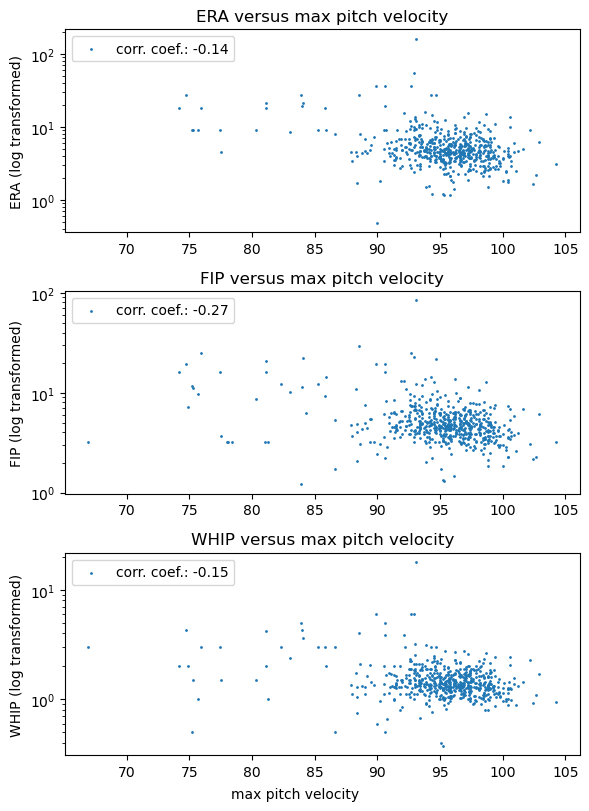

In [138]:
# visualization 

# calcualte the correlation coefficients
corr_era = np.corrcoef(merged['start_speed'],merged['ERA'])[0,1]
corr_fip = np.corrcoef(merged['start_speed'],merged['FIP'])[0,1]
corr_whip = np.corrcoef(merged['start_speed'],merged['WHIP'])[0,1]
list_corr = [corr_era,corr_fip,corr_whip]



fig, ax = plt.subplots(nrows=3, figsize=(6,8))

for n, metric in enumerate(['ERA','FIP','WHIP']):
    ax[n].scatter(x=merged['start_speed'],y=merged[metric],s=1, label=f'corr. coef.: {list_corr[n]:.2f}')
    ax[n].set_yscale('log')
    ax[n].set_ylabel(f'{metric} (log transformed)', fontsize=10)
    ax[n].set_title(f'{metric} versus max pitch velocity', fontsize=12)
    ax[n].legend()

fig.text(0.5, 0, 'max pitch velocity', ha='center', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# the plots show that max pitch velocity is a very weak predictor of performance (regardless of which metric is used)
# so now the big question is: 
# why does fastball velocity matter? 
# some specific questions to ask: 
# 1) as a trainer of a MLB prospect, under what circumstances should you train your pitcher to throw harder (faster fastball)
# and under what circumsntances should your pitcher focus on other aspects (e.g. breaking ball, control, and tons of etc.)
# 2) (TBD)

# note that one of the most lethal shortcomings of this study is that the dataset does not involve spin rate (all shown as placeholder)
# describe how the study can be better if spin rate data can be accessed 


# -------------

# archived ideas
# so now there are two questions: 
# 1) is there a certain threshold that a pitcher's fastball velocity should be trained to reach? 
# & after reaching that threshold, 
# 
# should pitchers be trained to throw harder? or they should focus on other aspects e.g. breaking ball, 


# next is to understand what are the differences between a pitcher with higher velo and lower velo
# specifically, what aspects does a lower velo pitcher excel their counterparts

In [141]:
# first, it is good to explore the data of the top performers in the MLB 
# assume that there are two types of pitchers: 1) fast ball dominant, and 2) non fast ball dominant (check if this is the proper term)

# scheme: use KMeans to classify the pitchers into two clusters (fast ball pitchers v.s. non fastball pitchers)
# steps: 
# 1. group by pitchers to summarize their:
#   a) fast ball average velo, b) fast ball use rate, c) fast ball performance (choose a metric: hit rate?)
# 2. cluster them into two groups 
# 3. from the top n performers (refer to question 1 with a certain metric)
#   also with a threshold such that they need to pitch more than m innings
#   find the ratio of them being either fast ball pitchers or not



# fastball_stats = df.groupby('pitcher_id',).summarize()

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, n_init='auto')

In [ ]:
# the next 

In [ ]:
# 2. categorize pitchers into fastball-based and non-fastball-based

# --- ARCHIVED CODES BELOW ---

In [ ]:
# first off, calculate the number of batters faced by each pitcher 

# generally, without considering any other factors (e.g. age, injury, etc.), a good pitcher is expected to be used 
# more frequently by the team

# repeatedly by the team throughout the season
# instead of only once or twice

# the column pitch_num is the pitch count of every at_bat 
# which means that by calculating the occurrence of pitch_number == 1
# we would be able to know how many batters a pitcher faced off thorughout this season

batters_faced_df = df[df['pitch_num']==1.0].groupby('pitcher_id')['pitch_num'].sum().sort_values().rename('batters_faced').to_frame()
batters_faced_df


In [ ]:
batters_faced_df.plot.hist(bins=50)
df_players[df_players['id']==501985]
df_players[df_players['first_name']=='Lance']


In [ ]:
df.groupby('pitch_type')['start_speed'].describe().sort_values('max',ascending=False)

In [ ]:
# from the .describe() table, pitches that have max velo over 100mph are SI, FF, FT and FC.
# SI even has the highest max velo (even faster than FF and FT) 

# however, in most scenarios, only four-seam and two-seam are considered straight up fastball
# this can also be intepretted from the visualization

In [ ]:
# visualize the distributions of the top four pitches (FF, FT, SI, FC) in terms of repeat measure (i.e. group by pitchers)

FF = df[df['pitch_type']=='FF'].groupby('pitcher_id')['start_speed'].mean().rename('four_seam')
FT = df[df['pitch_type']=='FT'].groupby('pitcher_id')['start_speed'].mean().rename('two_seam')
SI = df[df['pitch_type']=='SI'].groupby('pitcher_id')['start_speed'].mean().rename('sinker')
FC = df[df['pitch_type']=='FC'].groupby('pitcher_id')['start_speed'].mean().rename('cutter')

fastballs = pd.concat([FF, FT, SI, FC], axis=1)
# fastballs

# reshape to long dataframe (for seaborn)
fastballs_long = fastballs.melt(var_name='type', value_name='speed')
# fastballs_long

sns.set(style='whitegrid')
sns.color_palette("Set2")
sns.histplot(data=fastballs_long, x='speed', hue='type', bins=50, element='step', palette='Set2')
plt.show()

# ignore warning messages
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
# when comparing the distribution of sinker to four-seam and two-seam, it is actually ...(TODO)

In [ ]:
# now we only consider fastballs as either four-seam or two-seam. 
# to visualize the fastball velocity distribution of the MLB pitchers, first we need to decide
# how we are going to choose between FF and FT 

In [ ]:
# (decided to only consider FF and FT as fastballs)
# now visualize the ...
fastballs[fastballs['four_seam']<fastballs['two_seam']].sort_values('two_seam', ascending=False)
fastballs[fastballs['four_seam']>fastballs['two_seam']].sort_values('four_seam', ascending=False)
fb=fastballs.drop(columns=['sinker','cutter'])
fb.plot.scatter(x='four_seam',y='two_seam')

In [ ]:
# plot fast ball velo v.s. number of batter faced 
# to show that good fast ball velo is not the sole factor that contribute to the goodness of a pitcher

batters_faced_df
start_speed_df = df.groupby('pitcher_id')['start_speed'].max().to_frame()
battersfaced_speed = pd.concat([batters_faced_df,start_speed_df], axis=1)
battersfaced_speed

# battersfaced_speed.plot.scatter(x='batters_faced',y='pitch_num')
sns.lmplot(x='start_speed',y='batters_faced',data=battersfaced_speed,fit_reg=True,scatter_kws={'s':5}) 

# should get rid of the regression line here. 
# make a plot that get rid of the outliers and put up the regression line on that one

# result: the plot shows that even you have a max velo over 100mph, you are not guaranteed to be 
# one of the most used pitchers in your team
# also be mindful that this plot does not take in any additional information
# i.e. whether this pitcher injured themselves so that they did not pitch a lot 

In [ ]:
# analyze pitchers with slower fast ball - what else makes them so good?

In [ ]:
# now that we have three kinds of fastballs, we want to know whether a pitcher use one of the fastballs predominantly, 
# or there are actually some pitchers use a mix of different fast balls. 

# summarize a table that include ratios of different fastballs 
# and plot 

In [ ]:
# ARCHIVE

# next, consider a pitcher only use one of the three fastballs as their predominantly used fastball 
# find the type of fastball that each pitcher throws the most among the three 
# use that as 'his fastball' and plot a histogram of fastball velo across all MLB pitchers

# fastballs